In [1]:
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
plt.rcParams['axes.unicode_minus'] = False
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import konlpy
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.manifold import TSNE
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
import platform
path = 'c:/Windows/Fonts/malgun.ttf'
from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~~')

D:\python2020\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
D:\python2020\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [2]:
data_t = pd.read_csv("clean_ibk최종2.csv",encoding='utf8')

In [3]:
kkoma = konlpy.tag.Kkma()

In [4]:
with open('stopword.txt', 'r',encoding='utf8') as f:
    data = f.read()
stopword = data.splitlines()

In [5]:
g_stopword = ['ㄴ', 'ㄴ다', 'ㄴ다면', 'ㄴ즉', 'ㄹ', 'ㄹ라', 'ㄹ망정', 'ㄹ지라도', 'ㄹ지언정', 'ㅁ', 'ㅁ에도', 'ㅂ니까', 'ㅂ니다', '간에', '갈', '갖', '같', '개의', '거', '걱', '게', '게우', '겠', '견지', '결과', '결론', '겹', '고', '고려', '곤', '곳', '공동', '관', '관계', '관련', '관하', '구나', '구체적', '구토', '그러', '그러하', '그런', '그렇', '그리하', '그만이', '그중', '그치', '근거', '기', '기대', '기에', '기점', '기준', '김', '까', '까닭', '나머지', '남', '낫', '내', '널', '년도', '논하', '놀', '누', '느니', '는', '는가', '는다면', '니', '다', '다르', '다면', '다시', '달', '달리', '답', '닿', '대로', '대하', '댕', '더', '더불', '더욱이', '데', '도', '도달', '도록', '도착', '동시', '됏', '되', '두', '뒤따르', '뒤잇', '든지', '듣', '듯하', '따르', '따름', '따지', '때문', '라', '라도', '라면', '랏', '려고', '마라', '막론', '만', '만이', '만큼', '만하', '많', '말', '말고', '말하', '메', '면', '모르', '몰', '못하', '무릎쓰', '미치', '바', '바꾸', '밖', '밖에', '반대', '방면', '번째', '보', '보다', '본대', '부', '부류', '불구하', '불문', '비걱거리', '비기', '비슷', '비추', '비하', '뿐', '삐걱거리', '사람', '상대적', '생각', '서', '서술', '수', '수록', '스', '슬', '시', '시작', '시초', '시키', '쓰겁', '쓰이', '아도', '아래', '아무', '아서', '아요', '안', '안되', '않', '알', '았', '앞', '어기', '어도', '어떠하', '어떻', '어떻하', '어서', '어야', '어요', '어쩌', '어찌하', '얼', '없', '었', '여도', '여야', '연', '연관', '였', '옆', '오르', '외', '요만', '우', '위', '위하', '윗', '으', '으면', '은', '의거', '의지', '의하', '이러', '이러이러하', '이러하', '이렇', '이렇게', '이르', '이외', '이용', '이유', '이천', '인하', '일반적', '임', '입각', '입장', '잇', '잇따르', '있', '자면', '적이', '점', '정도', '제외', '조', '종합', '좋', '주저', '줄', '중', '중의', '즈음', '지', '지경', '쪽', '차', '첫', '총적', '켠', '타', '터', '토하', '통하', '틀림없', '편', '하구', '하기는', '하다', '하도', '하면', '한', '한하', '항목', '해', '해보', '향하', '형식', '후', '힘', '힘입','ㄴ다고', 'ㄴ다는', 'ㄴ다면', 'ㄴ데', 'ㄹ지','겠', '겪', 'ㅁ', 'ㅂ니다']

In [6]:
stop_words = stopword+g_stopword

In [7]:
tfidf = TfidfVectorizer(tokenizer=kkoma.morphs, max_features = 1000, min_df = 200, max_df = 0.7, stop_words =stop_words )

In [8]:
vectorizer =tfidf.fit_transform(data_t['clean_content'])

D:\python2020\lib\site-packages\sklearn\feature_extraction\text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ㅂ', '간', '그만', '늘', '다고', '델', '든', '망', '불구', '뿔', '아물', '어쩧', '이릏', '정', '지라', '지언', '켜'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [9]:
print(tfidf.get_feature_names())

['a', 'b', 'cj', 'co', 'd', 'g', 'gs', 'ib', 'it', 'kb', 'keb', 'kmib', 'kr', 'kt', 'lg', 'm', 'mt', 'nh', 'p', 's', 'sk', 'v', '∼', '가격', '가계', '가능', '가능성', '가량', '가운데', '가입', '가장', '가지', '가치', '간', '간편', '감독', '감사', '감소', '감안', '강', '강세', '강조하', '강화', '갖추', '개', '개발', '개선', '개설', '개월', '개인', '개최', '개편', '거나', '거두', '거래', '거래소', '거래일', '거치', '건', '건설', '걸', '검토', '게임', '결정', '결제', '겸', '경', '경기', '경영', '경우', '경쟁', '경쟁력', '경제', '경험', '계속', '계약', '계열사', '계좌', '계획', '고객', '고용', '공', '공개', '공격', '공공', '공급', '공단', '공모', '공사', '공시', '공연', '공장', '과거', '과장', '과정', '과학', '관계자', '관리', '관심', '광고', '광주', '교수', '교육', '구매', '구성', '구조', '구축', '국', '국가', '국내', '국민', '국장', '국제', '권', '규', '규모', '규제', '그동안', '그룹', '근', '근로자', '글로벌', '금', '금리', '금액', '금지', '금호', '급', '급등', '급락', '급증', '긍정적', '기간', '기관', '기금', '기능', '기대감', '기대되', '기로', '기록', '기록하', '기반', '기사', '기술', '기업', '기존', '기회', '기획', '길', '꼽히', '꾸준히', '나가', '나서', '나오', '나타나', '나타내', '남북', '남자', '낮', '낮추', '내년', '내놓', '내다보', '내리', '내부', '내용', '넘', '

In [10]:
tfidf_dict=tfidf.get_feature_names()

In [11]:
data_array = vectorizer.toarray()
data = pd.DataFrame(data_array, columns=tfidf_dict)
data.shape

(10539, 1000)

In [12]:
tsne = TSNE(n_components=2, n_iter=10000, verbose=1)

In [13]:
data_array.shape

(10539, 1000)

In [14]:
data_array.T.shape

(1000, 10539)

In [15]:
Z = tsne.fit_transform(data_array.T)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1000 samples in 1.767s...
[t-SNE] Computed neighbors for 1000 samples in 20.081s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 0.576455
[t-SNE] KL divergence after 250 iterations with early exaggeration: 142.209930
[t-SNE] KL divergence after 2100 iterations: 2.330186


In [16]:
print(Z[0:5])
print('Top words: ',1000)

[[-5.118584    4.4588876 ]
 [-0.9491003  -0.3041964 ]
 [-0.60651606  0.631895  ]
 [-5.2264805   4.4775987 ]
 [-0.67688334  6.0496726 ]]
Top words:  1000


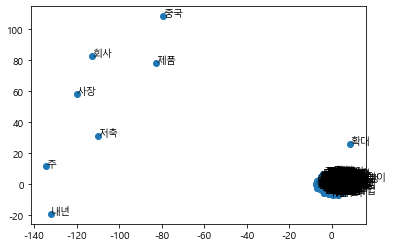

In [17]:
# TF-IDF score Top 1000 단어 시각화
plt.scatter(Z[:,0], Z[:,1])
for i in range(len(tfidf_dict)):
    plt.annotate(s=tfidf_dict[i].encode("utf8").decode("utf8"), xy=(Z[i,0], Z[i,1]))
plt.rcParams["figure.figsize"] = (50,50)
plt.draw()

In [18]:
X= vectorizer

In [19]:
X.shape

(10539, 1000)

In [20]:
Y=data_t.loc[:, 'up/down'].values

In [21]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=321)

In [22]:
LR = LogisticRegression()
LR.fit(x_train, y_train)
Y_pred = LR.predict(x_test)
print( "Logistic regression accuracy : " + str(np.round(metrics.accuracy_score(y_test,Y_pred),3)))

Logistic regression accuracy : 0.535


In [23]:
score = cross_val_score(LR,X,Y)
print('로지스틱 회귀 교차검증 점수 : {:2f}'.format(score.mean()))

로지스틱 회귀 교차검증 점수 : 0.495492


In [24]:
n_feature = X.shape[1]

In [25]:
from sklearn.ensemble import RandomForestClassifier

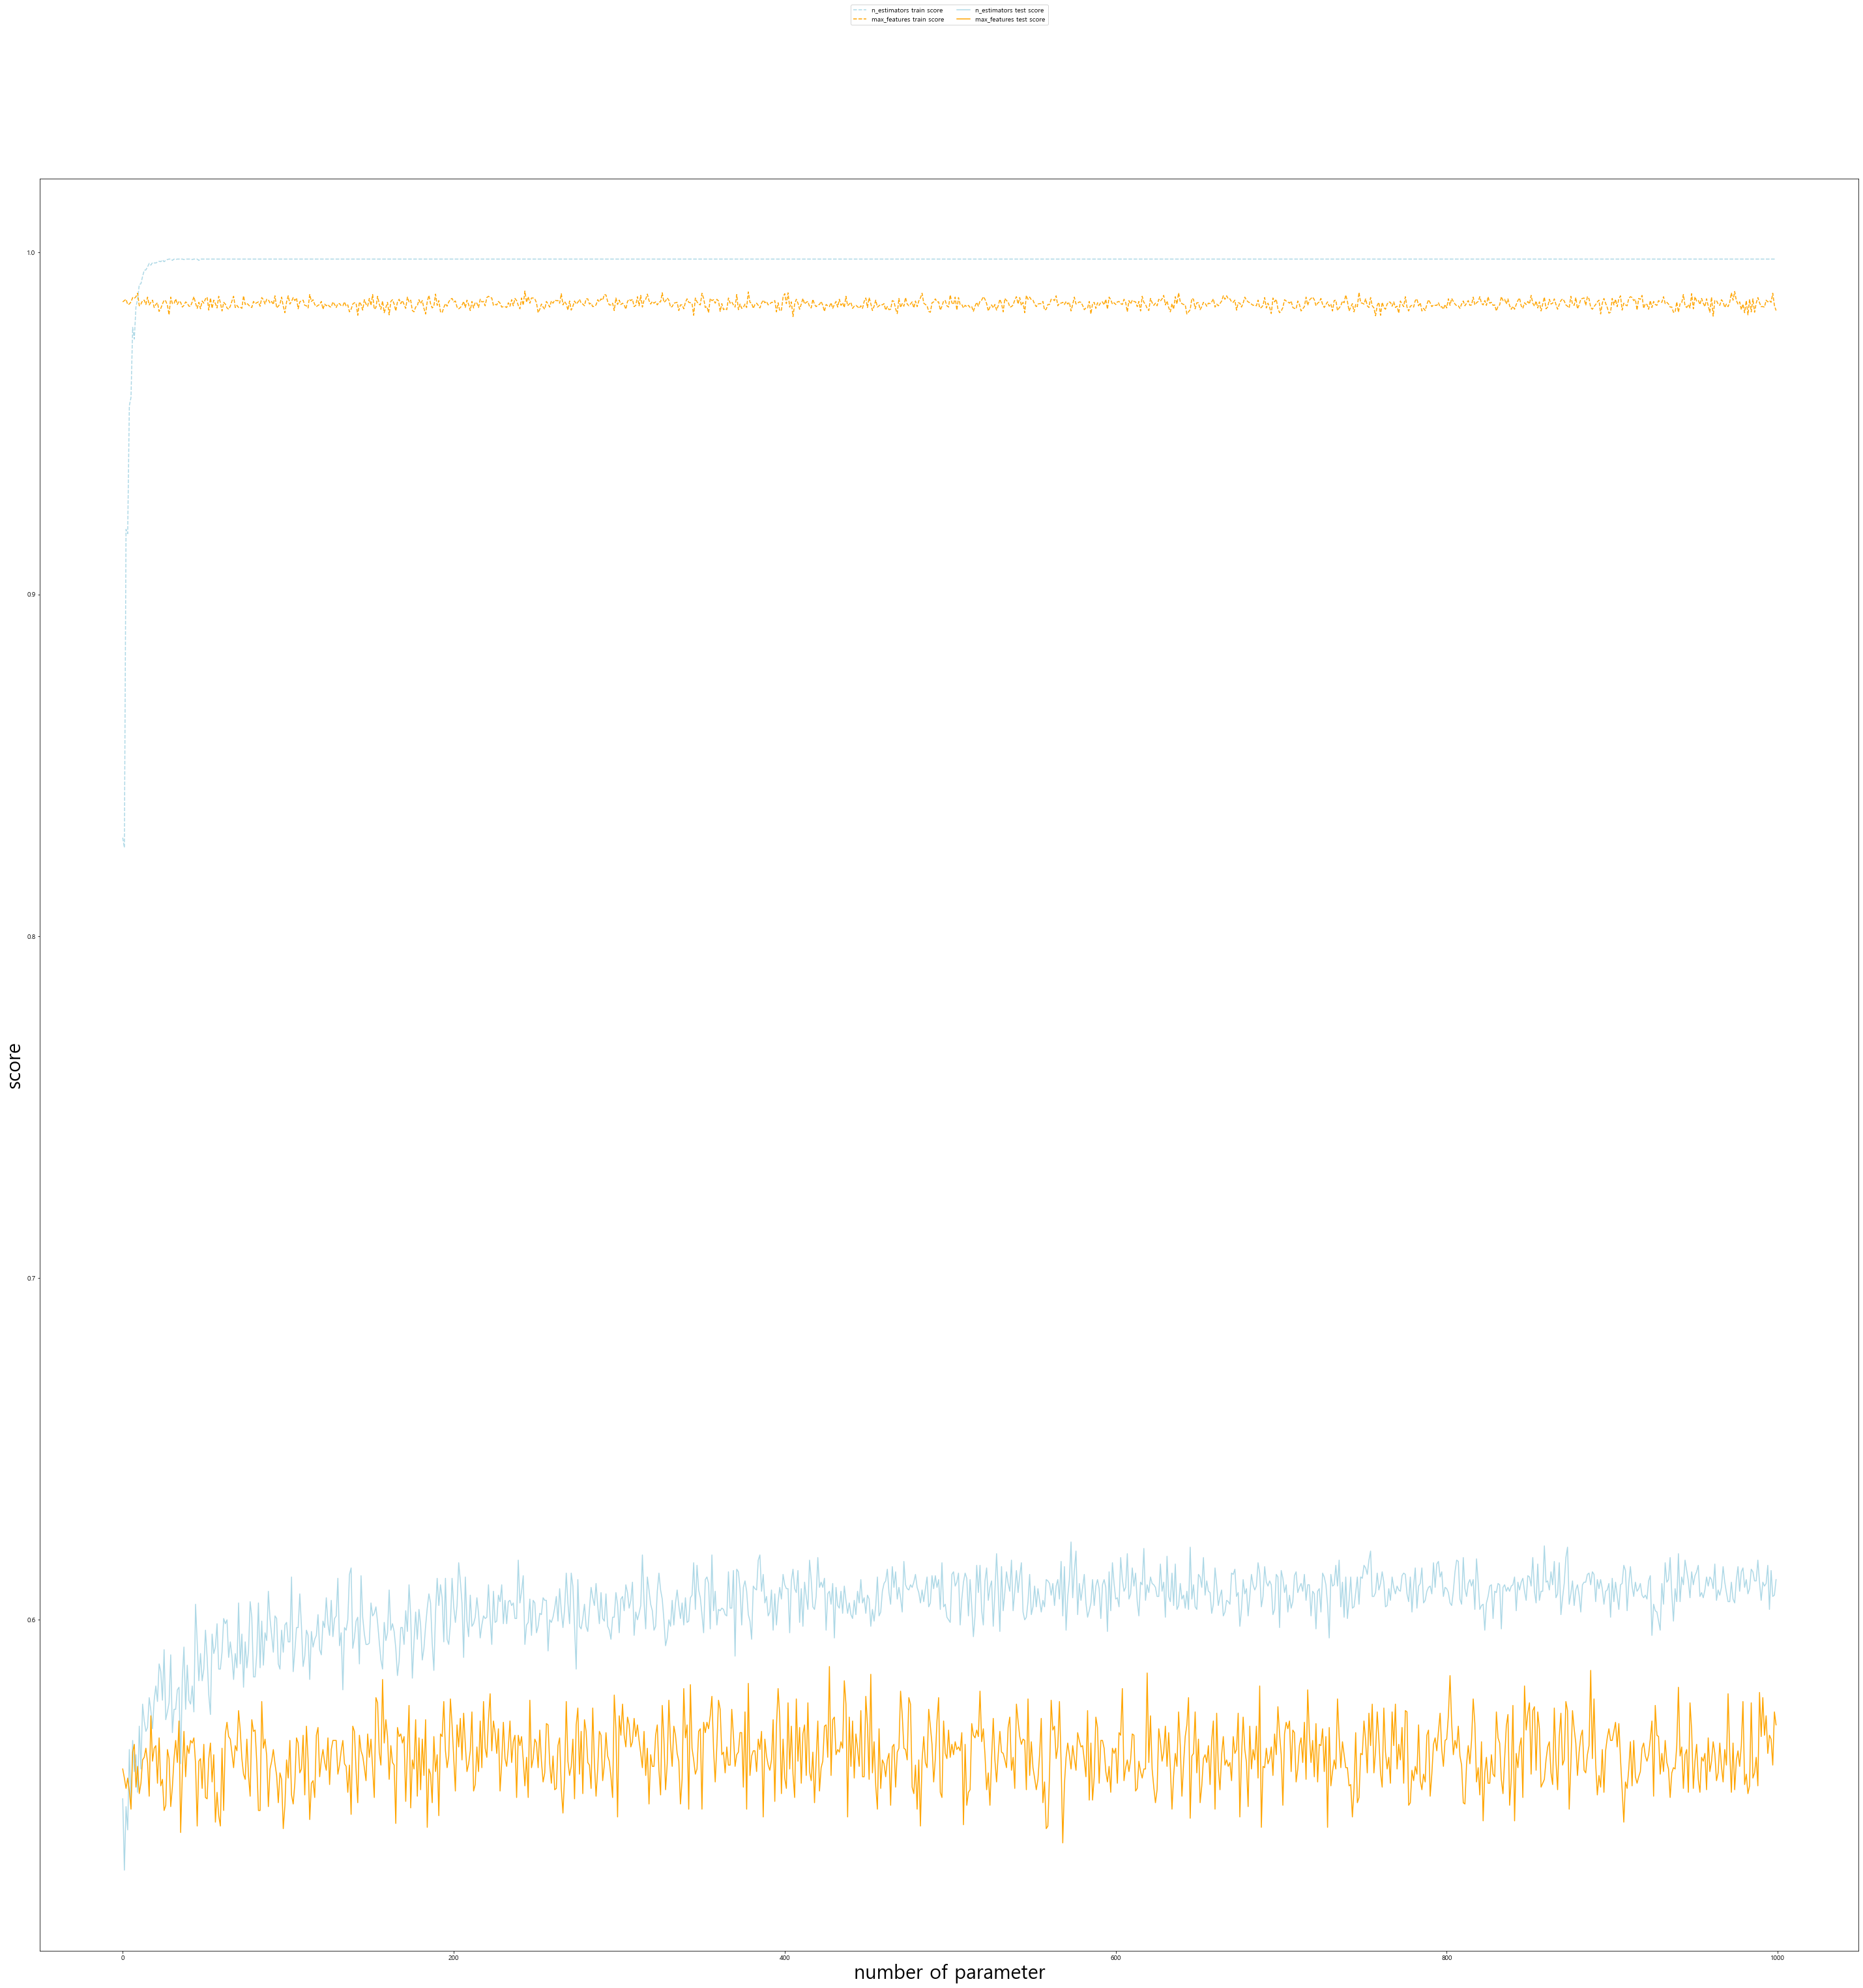

In [37]:
index = np.arange(len(score_n_tr_est))

plt.plot(index, score_n_tr_est, label='n_estimators train score', color='lightblue', ls='--') # ls: linestyle

plt.plot(index, score_m_tr_mft, label='max_features train score', color='orange', ls='--')

plt.plot(index, score_n_te_est, label='n_estimators test score', color='lightblue')

plt.plot(index, score_m_te_mft, label='max_features test score', color='orange')

plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1),

           ncol=2, fancybox=True, shadow=False) # fancybox: 박스모양, shadow: 그림자

plt.xlabel('number of parameter', size=30)

plt.ylabel('score', size=30)
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)


plt.show()

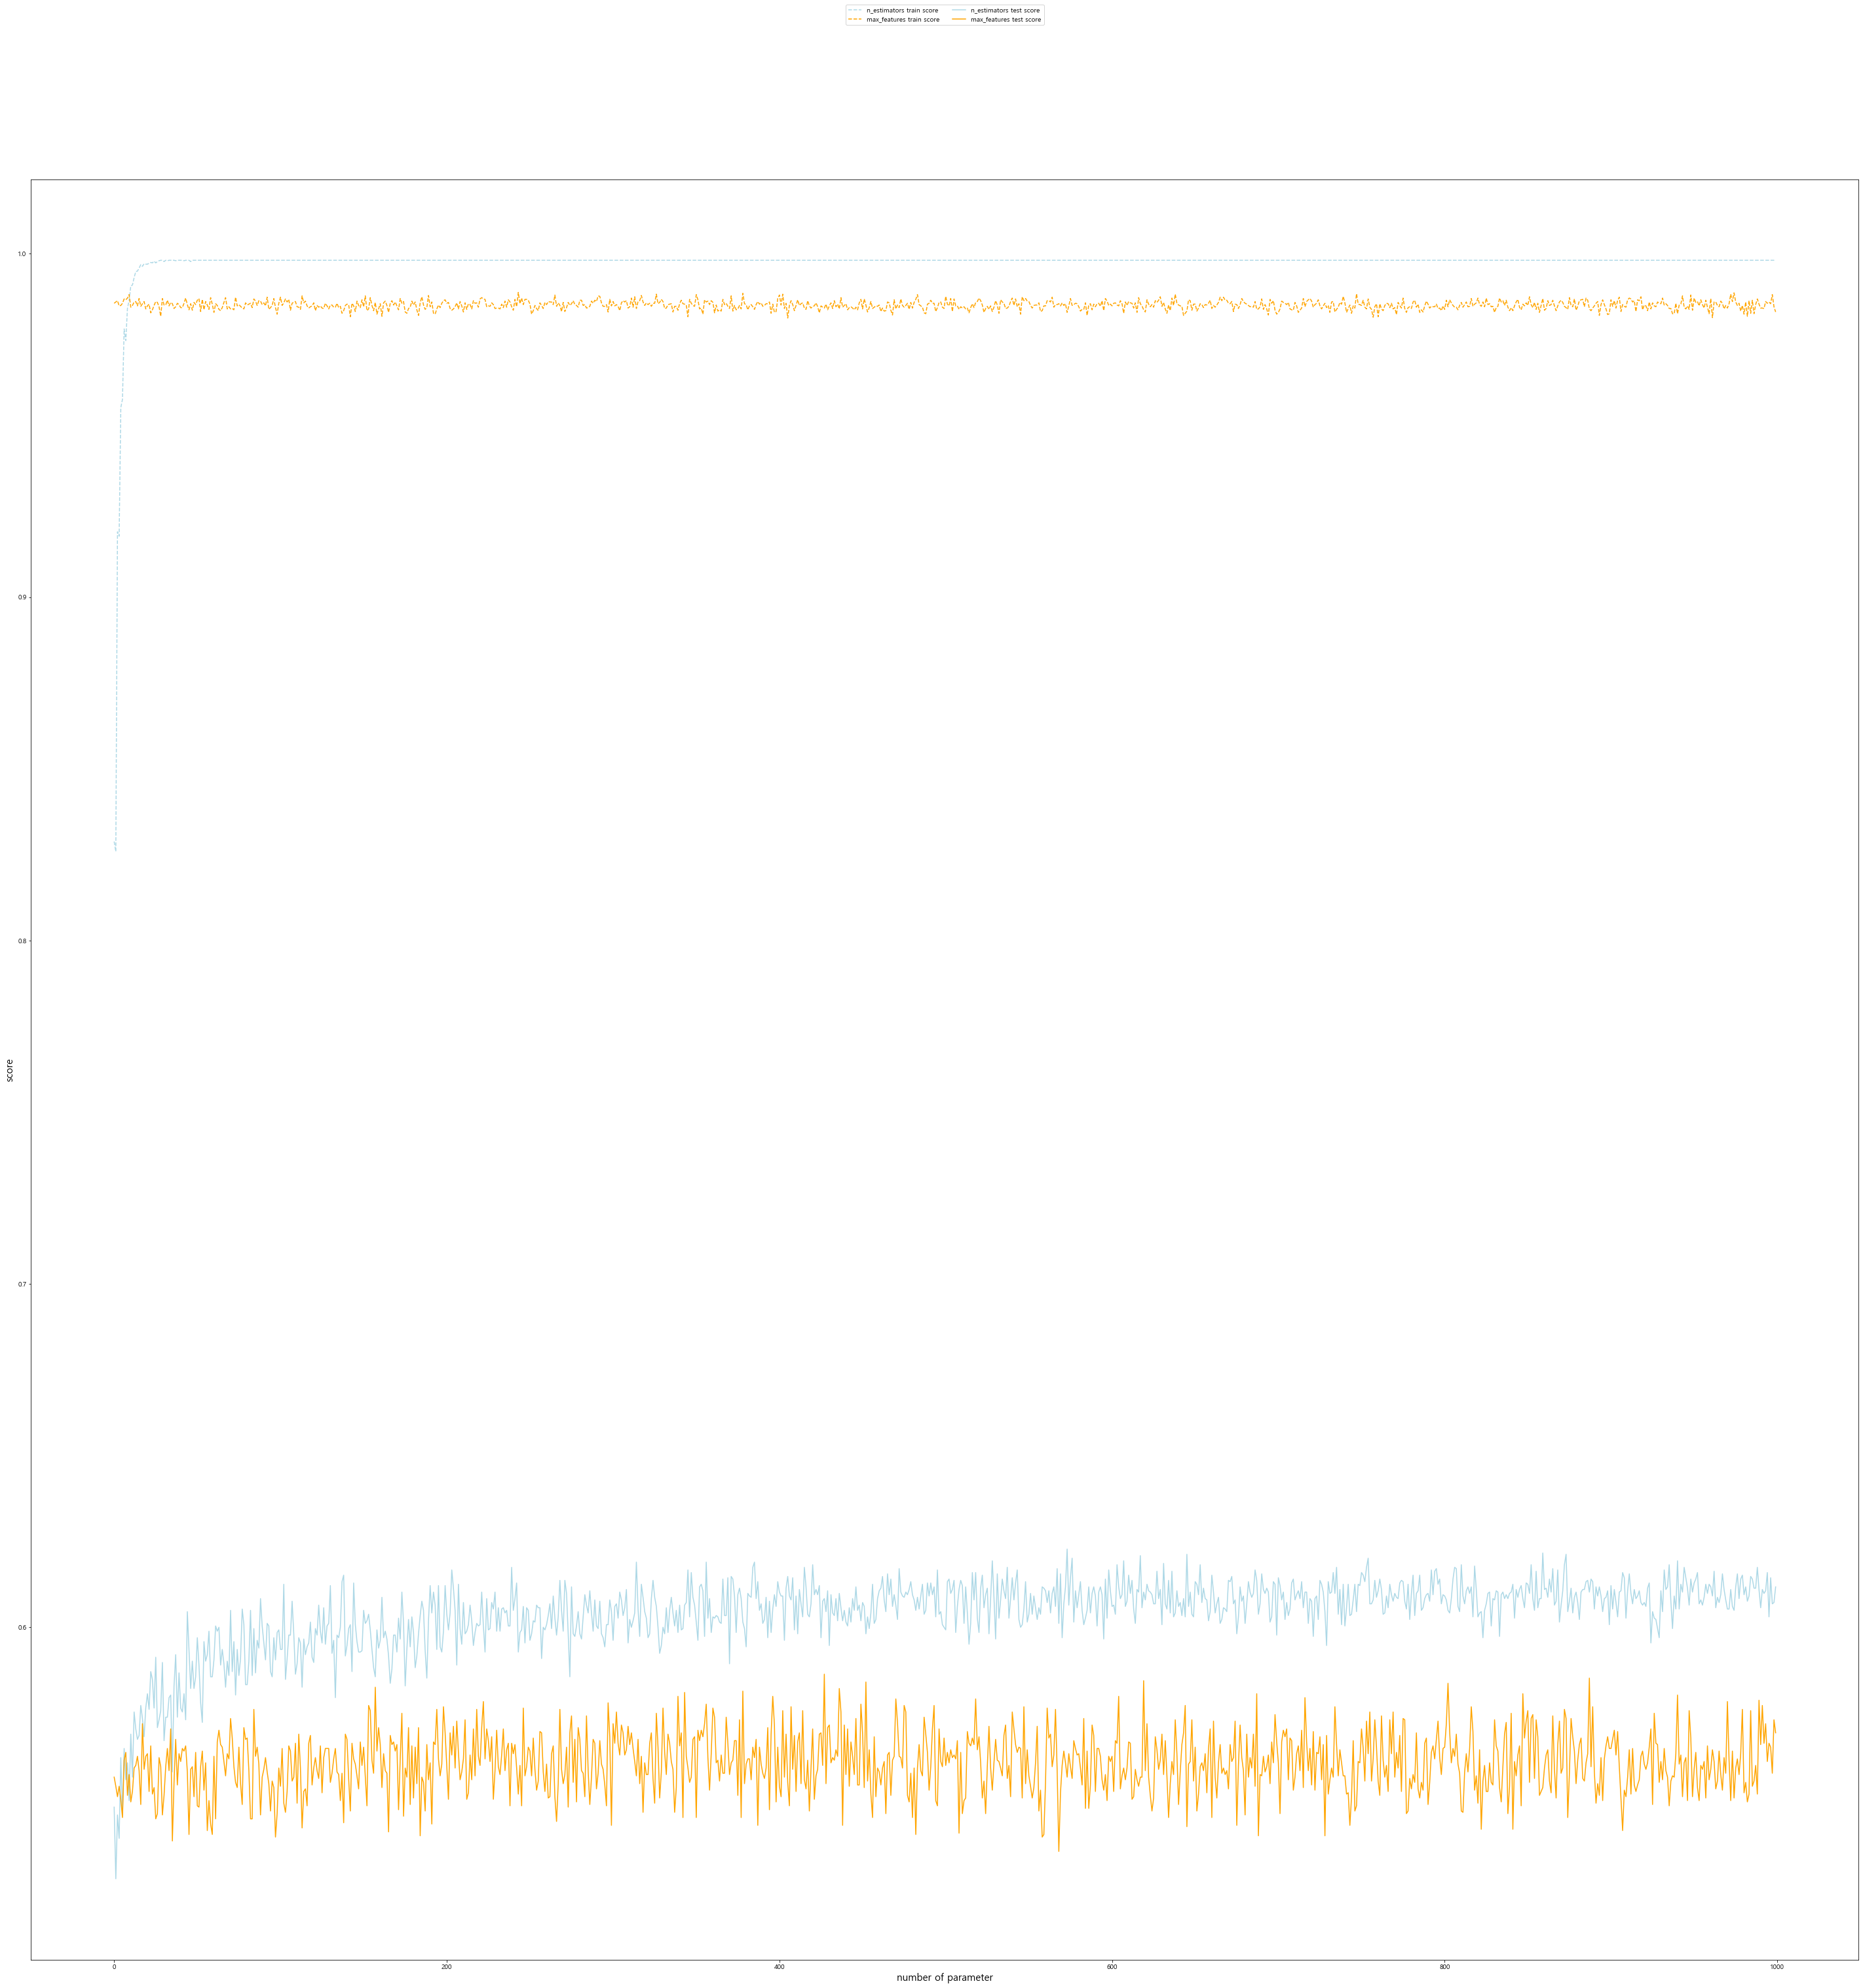

In [32]:
score_n_tr_est = []

score_n_te_est = []

score_m_tr_mft = []

score_m_te_mft = []



for i in np.arange(1, n_feature+1): # n_estimators와 max_features는 모두 0보다 큰 정수여야 하므로 1부터 시작

    params_n = {'n_estimators':i, 'max_features':'auto', 'n_jobs':-1} # **kwargs parameter

    params_m = {'n_estimators':10, 'max_features':i, 'n_jobs':-1}



    forest_n = RandomForestClassifier(**params_n).fit(x_train, y_train)

    forest_m = RandomForestClassifier(**params_m).fit(x_train, y_train)

    

    score_n_tr = forest_n.score(x_train, y_train)

    score_n_te = forest_n.score(x_test, y_test)

    score_m_tr = forest_m.score(x_train, y_train)

    score_m_te = forest_m.score(x_test, y_test)



    score_n_tr_est.append(score_n_tr)

    score_n_te_est.append(score_n_te)

    score_m_tr_mft.append(score_m_tr)

    score_m_te_mft.append(score_m_te)



index = np.arange(len(score_n_tr_est))

plt.plot(index, score_n_tr_est, label='n_estimators train score', color='lightblue', ls='--') # ls: linestyle

plt.plot(index, score_m_tr_mft, label='max_features train score', color='orange', ls='--')

plt.plot(index, score_n_te_est, label='n_estimators test score', color='lightblue')

plt.plot(index, score_m_te_mft, label='max_features test score', color='orange')

plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1),

           ncol=2, fancybox=True, shadow=False) # fancybox: 박스모양, shadow: 그림자

plt.xlabel('number of parameter', size=15)

plt.ylabel('score', size=15)


plt.rc('font',size=medium_size)
plt.rc('axes',titlesize=medium_size)
plt.rc('axes',labelsize=medium_size)
plt.rc('xtick',labelsize=medium_size)
plt.rc('ytick',labelsize=medium_size)
plt.rc('legend',fontsize=medium_size)
#plt.rc('figure',titlesize=medium_size)
plt.show()

In [30]:
print(score_n_tr)
print(score_n_te)
print(score_m_tr)
print(score_m_te)

0.9981022267206477
0.608349146110057
0.9849443319838057
0.5768500948766604
